# Script to describe the data

In [3]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from utils import misc
import sys


root_path = '/Users/rasmusklitteandersen/Library/CloudStorage/GoogleDrive-rasmusklitteandersen@gmail.com/Mit drev/speciale/'
data_path = f'{root_path}data/final_dataset_test.csv'
model_path = f'{root_path}models/'
path_to_images = f'{root_path}images/'
base_log_dir = f'{model_path}logs/'
base_tuning_dir = f'{model_path}tuning/'
results_dir = f'{root_path}results/'
tables_dir = f'{root_path}tables/'

# Specify the desired start and end time
start_time = pd.Timestamp(2019, 10, 31)
end_time = pd.Timestamp(2024, 7, 2)

### Load preprocessed data

In [4]:
from utils.misc import LoadData

load_data = LoadData()
df, TIME_PERIOD = load_data.load_and_preprocess_data(data_path, start_time, end_time)
#df, time_period = misc.LoadData.load_and_preprocess_data(data_path, start_time, end_time) # Load and preprocess data
print(df.head())

                     Day Ahead Spot Price  Offshore Wind  Onshore Wind  Solar  \
time                                                                            
2019-11-01 01:00:00            216.559998     400.875000    391.708344    0.0   
2019-11-01 02:00:00            202.589996     402.000000    389.166656    0.0   
2019-11-01 03:00:00            195.500000     425.666656    430.791656    0.0   
2019-11-01 04:00:00            195.270004     501.333344    500.708344    0.0   
2019-11-01 05:00:00            287.679993     598.750000    561.333313    0.0   

                     Temperature  Precipitation  Hydro Reservoir Levels  \
time                                                                      
2019-11-01 01:00:00         -0.1            0.0                0.847514   
2019-11-01 02:00:00         -0.8            0.0                0.847514   
2019-11-01 03:00:00         -1.0            0.0                0.847514   
2019-11-01 04:00:00         -1.1            0.0          

In [5]:
import numpy as np
from scipy.stats import skew, kurtosis

TIME_START = '2019-10-31'
TIME_END_PERIODS = ['2021-09-30', '2023-01-01', '2024-07-01']
load_data = LoadData()

def calculate_metrics(column):
    metrics = {
        '# of Observations': len(column),
        'Min': column.min(),
        'Max': column.max(),
        'Mean': column.mean(),
        'Standard deviation': column.std(),
        'Skewness': skew(column),
        'Kurtosis': kurtosis(column)
    }
    return metrics

for i in range(len(TIME_END_PERIODS)):
    TIME_END = TIME_END_PERIODS[i]
    df, TIME_PERIOD = load_data.load_and_preprocess_data(data_path, TIME_START, TIME_END)
    # Function to calculate descriptive statistics for a given column


    # Apply the function to each column in the DataFrame
    # Apply the function to the 'Day Ahead Spot Price' column
    results = calculate_metrics(df['Day Ahead Spot Price'])

    # Convert results to a DataFrame by wrapping in a list
    results_df = pd.DataFrame([results])  # Wrapping in a list converts dictionary to one-row DataFrame
    #results_df = results_df.T  # Transpose for readability
    #results_df.columns = ['Day Ahead Spot Price']  # Add column name for clarity

    print(results_df)
    latex_table = results_df.to_latex(buf=f'{tables_dir}day-ahead_prices_from_{TIME_START}_to_{TIME_END}.tex',
                                      index=True, 
                                  caption=f'Descriptive statistics of day-ahead prices from {TIME_START} to {TIME_END}.',
                                  label="table:descriptive_stats",
                                  column_format="lccccccc",
                                  header=True, 
                                  bold_rows=True)
    
    # Generate and save a histogram for the 'Day Ahead Spot Price' column
    plt.figure(figsize=(12, 6))
    #plt.hist(df['Day Ahead Spot Price'], bins=50, color='skyblue', edgecolor='black')
    sns.histplot(df['Day Ahead Spot Price'], bins=100, kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of Day-Ahead Prices from {TIME_START} to {TIME_END}")
    plt.xlabel("Day-Ahead Price")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{path_to_images}day_ahead_price_histogram_{TIME_START}_to_{TIME_END}.png')
    plt.close()

                 

   # of Observations        Min          Max        Mean  Standard deviation  \
0              16799 -437.48999  1762.359985  317.712793          238.129326   

   Skewness  Kurtosis  
0  1.260261  2.611651  
   # of Observations        Min          Max        Mean  Standard deviation  \
0              27791 -437.48999  6478.240234  793.941692           896.64793   

   Skewness  Kurtosis  
0  2.042732  4.718892  
   # of Observations          Min          Max        Mean  \
0              40919 -3277.389893  6478.240234  727.276021   

   Standard deviation  Skewness  Kurtosis  
0          769.675132  2.399062  7.553679  


In [6]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Initialize variables and load_data object
TIME_START = '2019-10-31'
TIME_END_PERIODS = ['2021-09-30', '2023-01-01', '2024-07-01']
load_data = LoadData()

# Function to calculate descriptive statistics for a given column
def calculate_metrics(column):
    metrics = {
        '# of Observations': len(column),
        'Min': column.min(),
        'Max': column.max(),
        'Mean': column.mean(),
        'Standard deviation': column.std(),
        'Skewness': skew(column),
        'Kurtosis': kurtosis(column)
    }
    return metrics

# List to store results for each time period
all_results = []

for i, TIME_END in enumerate(TIME_END_PERIODS):
    df, TIME_PERIOD = load_data.load_and_preprocess_data(data_path, TIME_START, TIME_END)
    
    # Calculate metrics for 'Day Ahead Spot Price' column
    results = calculate_metrics(df['Day Ahead Spot Price'])
    
    # Convert results to a DataFrame and add a column for the time period
    results_df = pd.DataFrame([results])
    results_df.insert(0, 'Time Period', TIME_PERIOD)  # Insert time period as the first column
    print(results_df)
    # Append results to the list
    all_results.append(results_df)

# Concatenate all results into a single DataFrame
combined_results_df = pd.concat(all_results, ignore_index=True)

# Round all numerical columns to two decimal places
combined_results_df = combined_results_df.round(2)

# Round each column to two decimal places and convert to string format
for col in combined_results_df.columns[1:]:  # Skip 'Time Period' column
    combined_results_df[col] = combined_results_df[col].apply(lambda x: f"{x:.2f}")


# Export combined results to LaTeX
latex_table = combined_results_df.to_latex(
    index=False,
    caption="Descriptive statistics of day-ahead prices across different time periods.",
    label="table:combined_descriptive_stats",
    column_format="lccccccc",
    header=True,
    bold_rows=True
)

# Save LaTeX output
with open(f'{tables_dir}day_ahead_descriptive_across_datasets.tex', 'w') as f:
    f.write(latex_table)

print(latex_table)


                Time Period  # of Observations        Min          Max  \
0  2019-10-31_to_2021-09-30              16799 -437.48999  1762.359985   

         Mean  Standard deviation  Skewness  Kurtosis  
0  317.712793          238.129326  1.260261  2.611651  
                Time Period  # of Observations        Min          Max  \
0  2019-10-31_to_2023-01-01              27791 -437.48999  6478.240234   

         Mean  Standard deviation  Skewness  Kurtosis  
0  793.941692           896.64793  2.042732  4.718892  
                Time Period  # of Observations          Min          Max  \
0  2019-10-31_to_2024-07-01              40919 -3277.389893  6478.240234   

         Mean  Standard deviation  Skewness  Kurtosis  
0  727.276021          769.675132  2.399062  7.553679  
\begin{table}
\caption{Descriptive statistics of day-ahead prices across different time periods.}
\label{table:combined_descriptive_stats}
\begin{tabular}{lccccccc}
\toprule
Time Period & # of Observations & Min &

# Correlation analysis

NameError: name 'time_period' is not defined

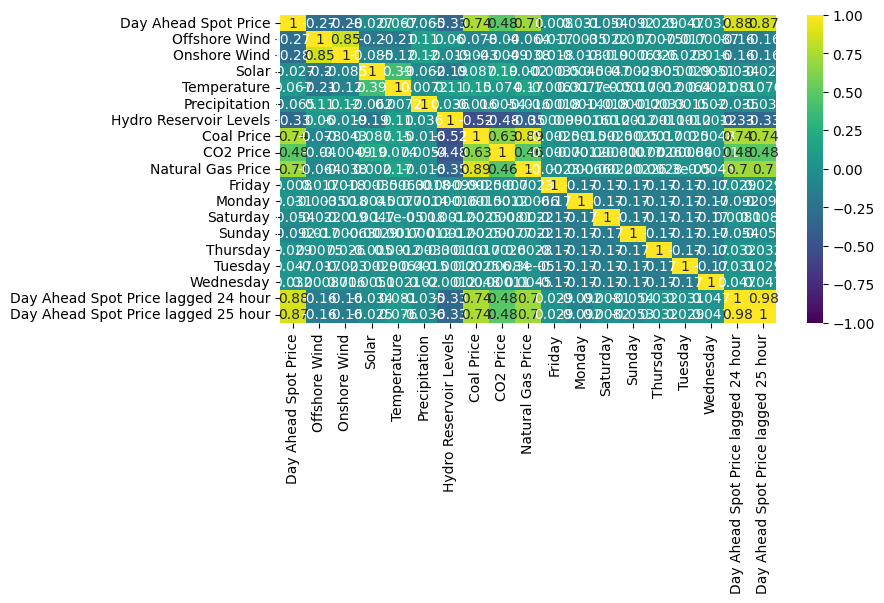

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
correlation_matrix = df.corr()  # Calculate correlation matrix

# Set the size of the figure
plt.figure(figsize=(8, 4))

# Draw the heatmap with annotation and the coolwarm colormap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)

# Display the plot
plt.savefig(f'{path_to_images}correlation/correlation_matrix_{time_period}.png')
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Sample data creation: replace this with your actual Series
# Assume `prices` is your Series with a datetime index
prices = df['Day Ahead Spot Price']

# Resampling the Series into specific time frames
daily_1 = prices.resample('D').mean()  # 1 day
daily_2 = prices.resample('2D').mean()  # 2 days
weekly_1 = prices.resample('W').mean()  # 1 week
weekly_2 = prices.resample('2W').mean()  # 2 weeks
monthly_1 = prices.resample('ME').mean()  # 1 month
monthly_2 = prices.resample('2ME').mean()  # 2 months
monthly_3 = prices.resample('3ME').mean()  # 3 months
quarterly_1 = prices.resample('QE').mean()  # 1 quarter
quarterly_2 = prices.resample('2QE').mean()  # 2 quarters
quarterly_3 = prices.resample('3QE').mean()  # 3 quarters
quarterly_4 = prices.resample('4QE').mean()  # 4 quarters
yearly_1 = prices.resample('YE').mean()  # 1 year
yearly_2 = prices.resample('2YE').mean()  # 2 years
yearly_3 = prices.resample('3YE').mean()  # 3 years
yearly_4 = prices.resample('4YE').mean()  # 4 years

# Combine all resampled series into a DataFrame
data = pd.DataFrame({
    '1D': daily_1,
    '2D': daily_2,
    '1W': weekly_1,
    '2W': weekly_2,
    '1M': monthly_1,
    '2M': monthly_2,
    '3M': monthly_3,
    '1Q': quarterly_1,
    '2Q': quarterly_2,
    '3Q': quarterly_3,
    '4Q': quarterly_4,
    '1Y': yearly_1,
    '2Y': yearly_2,
    '3Y': yearly_3,
    '4Y': yearly_4
})

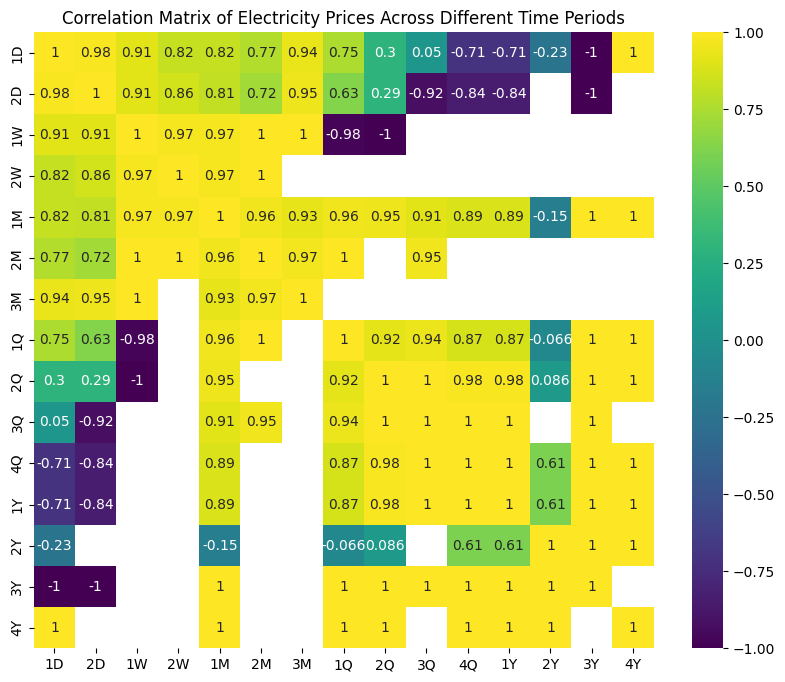

NameError: name 'time_period' is not defined

In [9]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Matrix of Electricity Prices Across Different Time Periods')

# Display the plot
plt.show()
plt.savefig(f'{path_to_images}correlation/correlation_matrix_across_time_{time_period}.png')

# Descriptive statistics

                     Day Ahead Spot Price  Offshore Wind  Onshore Wind  Solar  \
time                                                                            
2019-11-01 01:00:00            216.559998     400.875000    391.708344    0.0   
2019-11-01 02:00:00            202.589996     402.000000    389.166656    0.0   
2019-11-01 03:00:00            195.500000     425.666656    430.791656    0.0   
2019-11-01 04:00:00            195.270004     501.333344    500.708344    0.0   
2019-11-01 05:00:00            287.679993     598.750000    561.333313    0.0   

                     Temperature  Precipitation  Hydro Reservoir Levels  \
time                                                                      
2019-11-01 01:00:00         -0.1            0.0                0.847514   
2019-11-01 02:00:00         -0.8            0.0                0.847514   
2019-11-01 03:00:00         -1.0            0.0                0.847514   
2019-11-01 04:00:00         -1.1            0.0          

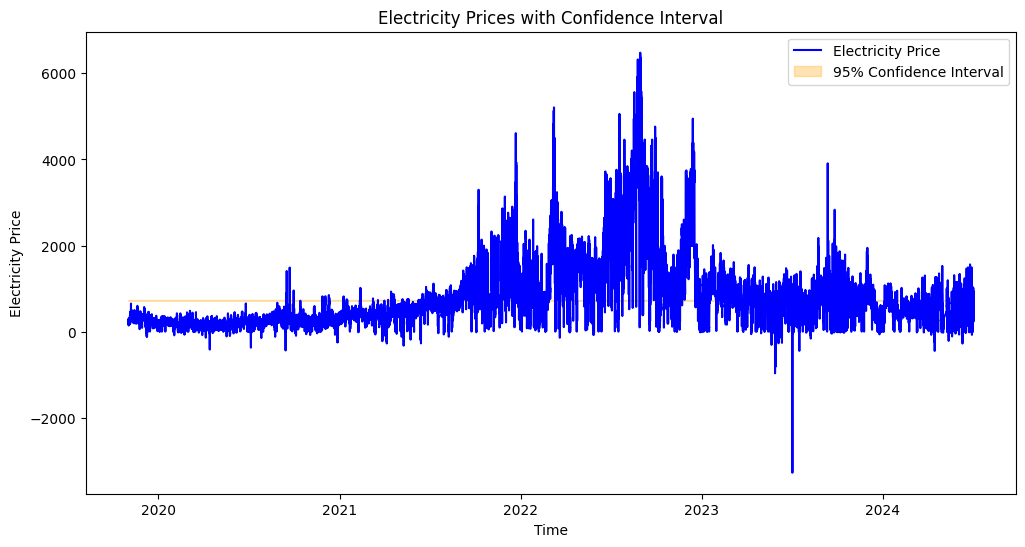

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print(df.head())
# Calculate mean and confidence intervals
data = df
mean_price = data['Day Ahead Spot Price'].mean()
confidence_interval = 1.96 * data['Day Ahead Spot Price'].std() / np.sqrt(len(data))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Day Ahead Spot Price'], label='Electricity Price', color='blue')
plt.fill_between(data.index, mean_price - confidence_interval, mean_price + confidence_interval, color='orange', alpha=0.3, label="95% Confidence Interval")
plt.xlabel("Time")
plt.ylabel("Electricity Price")
plt.legend()
plt.title("Electricity Prices with Confidence Interval")
plt.show()


In [17]:
import pandas as pd

# Assuming df is already defined and contains 'Day Ahead Spot Price'

# Get the hourly data and calculate statistics
data = df['Day Ahead Spot Price']
hours = pd.date_range('00:00:00', '23:00:00', freq='1h').hour

mean = data.groupby(data.index.hour).mean()
median = data.groupby(data.index.hour).median()
std = data.groupby(data.index.hour).std()
min = data.groupby(data.index.hour).min()
max = data.groupby(data.index.hour).max()
skew = data.groupby(data.index.hour).skew()
kur = data.groupby(data.index.hour).apply(lambda x: x.kurtosis())

lower = data.quantile(0.05)
upper = data.quantile(0.95)
meanclipped = data.clip(lower=lower, upper=upper).groupby(data.index.hour).mean()
skewclipped = data.clip(lower=lower, upper=upper).groupby(data.index.hour).skew()
kurclipped = data.clip(lower=lower, upper=upper).groupby(data.index.hour).apply(lambda x: x.kurtosis())

# Create DataFrame with hours as integers
mean_df = pd.DataFrame({
    'Hour': hours, 
    'Mean': mean, 
    'Mean w/o outliers': meanclipped, 
    'Median': median, 
    'Std': std,
    'Skew': skew, 
    'Skew w/o outliers': skewclipped,
    'Kurtosis': kur,
    'Kurtosis w/o outliers': kurclipped
}).reset_index(drop=True).round(2)

# Export to LaTeX with columns centered except the first one
mean_df.to_latex(buf=f'{tables_dir}day_ahead_descriptive.tex', index=False, 
                 caption="Descriptive statistics of Day Ahead Spot Prices for every hour of day", 
                 label='DayAheadDescriptive', float_format='%.2f', 
                 column_format='l' + 'c' * (len(mean_df.columns) - 1))

mean_df

,Hour,Mean,Mean w/o outliers,Median,Std,Skew,Skew w/o outliers,Kurtosis,Kurtosis w/o outliers
0,0,604.54,584.60,446.26,637.59,2.37,1.60,7.36,2.30
1,1,587.41,570.34,431.27,624.33,2.33,1.63,7.10,2.44
2,2,582.02,565.19,433.36,622.07,2.36,1.64,7.35,2.49
3,3,605.99,584.48,441.42,649.80,2.40,1.61,7.52,2.33
4,4,697.64,655.36,500.61,751.39,2.51,1.42,8.23,1.51
5,5,803.08,740.89,564.88,833.07,2.34,1.20,6.83,0.67
6,6,860.89,785.60,616.51,876.65,2.28,1.14,6.29,0.43
7,7,825.78,763.24,589.14,836.85,2.23,1.20,6.00,0.56
8,8,755.81,709.20,524.12,781.15,2.28,1.31,6.46,0.91
9,9,697.24,662.23,476.93,735.08,2.31,1.40,6.82,1.28


In [32]:
hours = {}
for i in range(24):
    hours[i] = data.loc[df.index.hour==i]

mean = []
meanclip = []
skew = []
skewclip = []
minimum = []
outlier_low = []
outlier_high = []
maximum = []
spikes_low = []
spikes_high = []
    
for i in [*hours]:
    iqr = hours[i].quantile(.75)-hours[i].quantile(.25)
    outlier_l = hours[i].quantile(.25)-3*iqr
    outlier_h = hours[i].quantile(.75)+3*iqr
    
    mean.append(hours[i].mean())
    skew.append(hours[i].skew())
    minimum.append(hours[i].min())
    outlier_low.append(outlier_l)
    outlier_high.append(outlier_h)
    maximum.append(hours[i].max())
    
    no_spikes_low = (hours[i]<outlier_l).sum()
    no_spikes_high = (hours[i]>outlier_h).sum()
    sh_spikes_low =  no_spikes_low/len(hours[i])
    sh_spikes_high =  no_spikes_high/len(hours[i])
    spikes_low.append(sh_spikes_low*100)
    spikes_high.append(sh_spikes_high*100)
    
    clip = hours[i].loc[(hours[i]>outlier_l) & (hours[i]<outlier_h)]

    meanclip.append(clip.mean())
    skewclip.append(clip.skew())
    
desc = {'Mean': mean, 'Mean w/o outliers': meanclip, 'Skew': skew, 'Skew w/o outliers': skewclip, 'Min': minimum, 'Max': maximum, 'Spikes (%)': np.array(spikes_low)+np.array(spikes_high)}

In [47]:
# desc_df = pd.DataFrame.from_dict(desc)
# desc_df.round(2).to_latex(buf=f'{tables_dir}day_ahead_descriptive.tex', 
#                           index=True, caption="Descriptive statistics for DayAhead each hour of day", 
#                           label='DARTdesc',
#                           float_format='%.2f')

In [34]:
desc_df.round(2)

,Mean,Mean w/o outliers,Skew,Skew w/o outliers,Min,Max,Spikes (%)
0,604.16,532.40,2.37,1.49,-222.47,4736.65,2.81
1,587.22,517.44,2.33,1.49,-222.99,4372.92,2.81
2,581.82,510.87,2.36,1.47,-159.18,4425.83,2.87
3,605.78,528.93,2.40,1.51,-130.93,4556.45,2.99
4,697.39,601.91,2.51,1.54,-164.86,5677.80,3.22
5,802.79,697.14,2.34,1.56,-249.82,5787.59,3.34
6,860.59,737.14,2.28,1.55,-222.44,5972.37,3.87
7,825.51,711.18,2.23,1.50,-147.23,5813.43,3.75
8,755.56,658.61,2.29,1.47,-275.54,5676.43,3.22
9,697.01,605.20,2.31,1.41,-730.62,5578.48,3.22


In [55]:
import pandas as pd

# Example DataFrame structure; replace with your actual DataFrame containing hourly prices.
# Let's assume your DataFrame is called 'data' and has a DateTimeIndex and a 'price' column.

# Filter the data to match the provided start and end time
start_time = pd.Timestamp(2019, 10, 31)
end_time = pd.Timestamp(2024, 7, 2)
filtered_data = data[(data.index >= start_time) & (data.index <= end_time)]

# Create a list to hold rows for each year
rows = []

# Resample by monthly and quarterly frequencies and calculate the mean of each period
for year in range(start_time.year, end_time.year + 1):
    # Filter for the current year
    year_data = filtered_data[filtered_data.index.year == year]
    
    # Monthly averages (1M, 2M, 3M)
    monthly_avg = year_data.resample('M').mean()
    
    # Quarterly averages (1Q, 2Q, 3Q, 4Q)
    quarterly_avg = year_data.resample('Q').mean()

    # Combine the monthly and quarterly averages
    row = {
        '1M': monthly_avg.iloc[0] if len(monthly_avg) > 0 else None,
        '2M': monthly_avg.iloc[1] if len(monthly_avg) > 1 else None,
        '3M': monthly_avg.iloc[2] if len(monthly_avg) > 2 else None,
        '1Q': quarterly_avg.iloc[0] if len(quarterly_avg) > 0 else None,
        '2Q': quarterly_avg.iloc[1] if len(quarterly_avg) > 1 else None,
        '3Q': quarterly_avg.iloc[2] if len(quarterly_avg) > 2 else None,
        '4Q': quarterly_avg.iloc[3] if len(quarterly_avg) > 3 else None
    }
    
    # Append the row dictionary to the list
    rows.append(pd.DataFrame(row, index=[year]))

# Concatenate all rows into a final DataFrame
result_table = pd.concat(rows)

# Set the index as 'SYS'
result_table.index.name = 'DK1'

# Display the result
print(result_table)

# You can save it to a file if needed
# result_table.to_csv('electricity_price_summary.csv')
result_table.round(2).to_latex(buf=f'{tables_dir}average_traded_prices.tex', 
                               index=True,
                                 caption="Average traded prices across different time periods", 
                                 label='average_traded_prices',
                                 float_format='%.2f',
                                 column_format='l' + 'c' * (len(result_table.columns) - 1))
                 


              1M          2M           3M           1Q           2Q  \
DK1                                                                   
2019  318.420002  311.930291   254.305014   283.222325          NaN   
2020  186.448186  131.392543   136.365363   151.841800   141.105499   
2021  373.376532  351.485164   335.497305   353.518595   436.109226   
2022  878.689670  841.631295  1753.841238  1168.601494  1361.656513   
2023  831.755242  880.097709   735.865128   813.766304   650.230735   
2024  557.411733  436.579325   456.485094   484.523100   442.379656   

               3Q           4Q  
DK1                             
2019          NaN          NaN  
2020   242.059502   208.926504  
2021   711.991816  1111.462219  
2022  2664.574220  1308.099664  
2023   584.578541   539.058053  
2024   632.402403          NaN  


/var/folders/2s/vzpsd8c17tx0pd2fs7c080pr0000gn/T/ipykernel_31008/3105559100.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = year_data.resample('M').mean()
/var/folders/2s/vzpsd8c17tx0pd2fs7c080pr0000gn/T/ipykernel_31008/3105559100.py:23: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_avg = year_data.resample('Q').mean()
/var/folders/2s/vzpsd8c17tx0pd2fs7c080pr0000gn/T/ipykernel_31008/3105559100.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_table = pd.concat(rows)


# Vintage data

In [14]:
d = [*df]
for v in d:
    print(v)
    print(df[v].describe())
    print('---------------------------------')

Day Ahead Spot Price
count    40945.000000
mean       727.022920
std        769.498967
min      -3277.389893
25%        253.929993
50%        511.869995
75%        889.169983
max       6478.240234
Name: Day Ahead Spot Price, dtype: float64
---------------------------------
Offshore Wind
count    40945.000000
mean       556.027789
std        335.524238
min          0.000000
25%        247.541672
50%        561.625000
75%        871.208313
max       1147.333374
Name: Offshore Wind, dtype: float64
---------------------------------
Onshore Wind
count    40945.000000
mean       966.691333
std        749.269077
min          0.250000
25%        339.708344
50%        765.875000
75%       1447.166626
max       3490.000000
Name: Onshore Wind, dtype: float64
---------------------------------
Solar
count    40945.000000
mean       153.053869
std        280.908553
min          0.000000
25%          0.000000
50%          3.622917
75%        192.456665
max       1904.428345
Name: Solar, dtype: float6

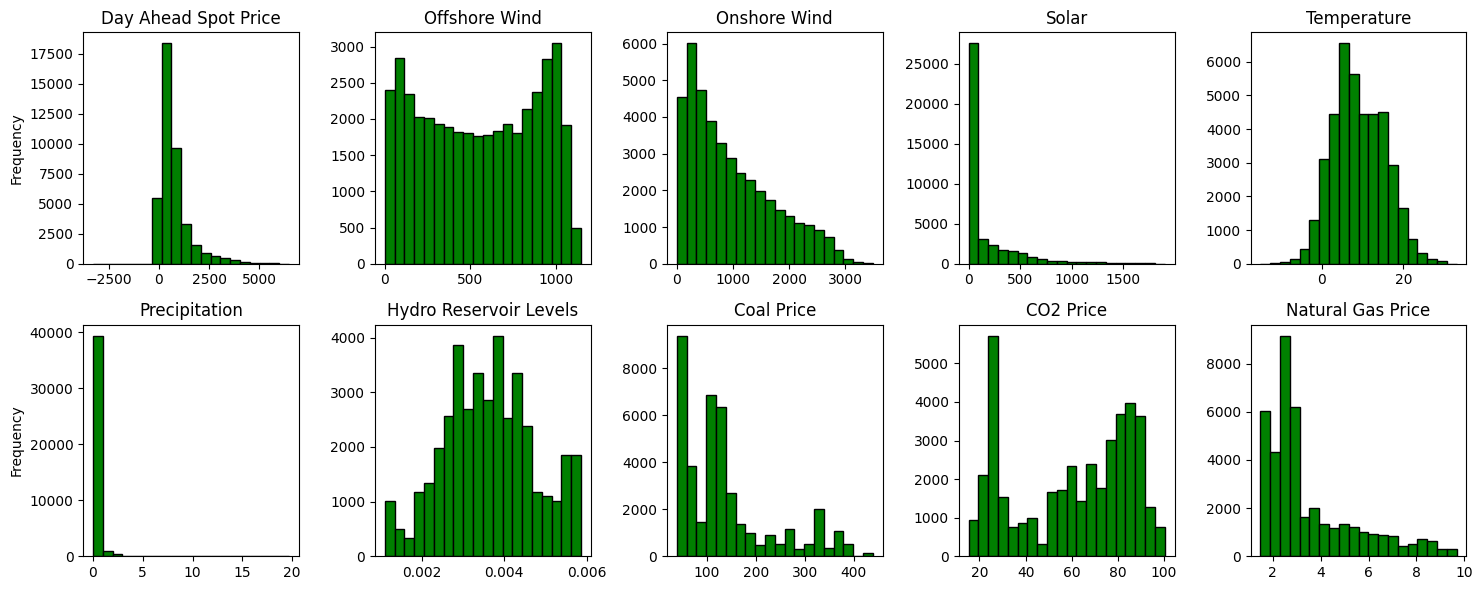

In [40]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
fig, ax = plt.subplots(2, 5, figsize=(15, 6))  # Increase figure size
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between subplots

for i, v in enumerate([*df][0:10]):  # Adjust the number of plots if required
    ax.ravel()[i].hist(df[v], bins=20, color='g', edgecolor='k')
    ax.ravel()[i].set_title(v)
    ax.ravel()[i].set_xlabel('')  # Add x-axis label
    if i == 0 or i == 5:  # Add y-axis label to the first subplot of each row
        ax.ravel()[i].set_ylabel('Frequency')  # Add y-axis label
    else:   
        ax.ravel()[i].set_ylabel('') 

# To handle any remaining axes if there are fewer than 10 variables
for j in range(i+1, 10):
    ax.ravel()[j].axis('off')  # Turn off unused subplots

plt.tight_layout()  # Automatically adjust subplot parameters for a nice fit
plt.show()


# Electricity balance

In [1]:
import requests # library for making HTTP requests
import pandas as pd # library for data analysis
import datetime as dt # library for handling date and time objects
import matplotlib.pyplot as plt # library for creating plots

path_to_images = '/Users/rasmusklitteandersen/Library/CloudStorage/GoogleDrive-rasmusklitteandersen@gmail.com/Mit drev/speciale/images/'
root_path = '/Users/rasmusklitteandersen/Library/CloudStorage/GoogleDrive-rasmusklitteandersen@gmail.com/Mit drev/speciale/'
data_path = f'{root_path}data/final_dataset.csv'
model_path = f'{root_path}models/'
path_to_images = f'{root_path}images/'
base_log_dir = f'{model_path}logs/'
base_tuning_dir = f'{model_path}tuning/'
results_dir = f'{root_path}results/'
tables_dir = f'{root_path}tables/'

# Specify the desired start and end time
start_time = pd.Timestamp(2019, 10, 31)
end_time = pd.Timestamp(2024, 7, 2)

In [6]:
start_date = start_time.strftime('%Y-%m-%d') #2015-01-01'
end_date = end_time.strftime('%Y-%m-%d') #'2022-06-01'

price_area  = '{"PriceArea":["DK1"]}'
url = f'https://api.energidataservice.dk/dataset/ElectricityBalanceNonv?offset=0&start={start_date}&end={end_date}&filter=%7B%22PriceArea%22:[%22DK1%22]%7D&sort=HourUTC%20DESC'
response = requests.get(
    url=url)

if response.ok:  # More idiomatic way to check for a successful request
    records = response.json().get('records', [])
    # Directly filtering necessary columns and renaming them
    el_balance = (pd.json_normalize(records).drop(columns=['HourDK', 'PriceArea'])
                          #.loc[:, ['HourUTC', 'SpotPriceDKK']]
                          #.rename(columns={'HourUTC': 'time', 'SpotPriceDKK': 'SpotPriceDK1'})
                          )

    # Convert 'time' column to datetime without timezone information
    #data_el_spot_DK1['time'] = pd.to_datetime(data_el_spot_DK1['time']).dt.tz_localize(None)

    # Display the first few rows of the processed DataFrame
    print(el_balance.head())
else:
    print(f"Failed to fetch data: {response.status_code}")

               HourUTC    TotalLoad    Biomass   FossilGas  FossilHardCoal  \
0  2024-07-01T21:00:00  2033.109985  33.980000  193.839996      351.549988   
1  2024-07-01T20:00:00  2173.250000  32.770000  119.709999      344.489990   
2  2024-07-01T19:00:00  2247.219971  32.830002  137.940002      291.890015   
3  2024-07-01T18:00:00  2310.610107  35.080002  237.660004      358.269989   
4  2024-07-01T17:00:00  2487.669922  32.369999  129.539993      297.880005   

   FossilOil  HydroPower  OtherRenewable  SolarPower      Waste  \
0  25.110001        1.39            1.84    0.520000  57.799999   
1  11.700000        1.40            1.16    0.490000  55.669998   
2  11.770000        1.40            1.18   15.400000  55.750000   
3  17.010000        1.40            1.70  110.519997  57.700001   
4  11.590000        1.40            1.16  271.149994  55.259998   

   OnshoreWindPower  OffshoreWindPower  ExchangeContinent  ExchangeGreatBelt  \
0        944.840027         588.400024       -27

In [24]:
# Create DataFrame
#el_balance = pd.DataFrame(data)

# Calculate shares of each energy source with respect to TotalLoad
sources = [
    'Biomass', 'FossilGas', 'FossilHardCoal', 
    'FossilOil', 'HydroPower', 'OtherRenewable', 
    'SolarPower', 'Waste', 'OnshoreWindPower', 
    'OffshoreWindPower'
]

for source in sources:
    el_balance[f'{source}_share'] = (el_balance[source] / el_balance['TotalLoad']) * 100

# Display the modified DataFrame with shares
print(el_balance.head())
el_balance.to_csv(f'{root_path}data/electricity_balance.csv', index=False)

                       TotalLoad    Biomass   FossilGas  FossilHardCoal  \
HourUTC                                                                   
2024-07-01 21:00:00  2033.109985  33.980000  193.839996      351.549988   
2024-07-01 20:00:00  2173.250000  32.770000  119.709999      344.489990   
2024-07-01 19:00:00  2247.219971  32.830002  137.940002      291.890015   
2024-07-01 18:00:00  2310.610107  35.080002  237.660004      358.269989   
2024-07-01 17:00:00  2487.669922  32.369999  129.539993      297.880005   

                     FossilOil  HydroPower  OtherRenewable  SolarPower  \
HourUTC                                                                  
2024-07-01 21:00:00  25.110001        1.39            1.84    0.520000   
2024-07-01 20:00:00  11.700000        1.40            1.16    0.490000   
2024-07-01 19:00:00  11.770000        1.40            1.18   15.400000   
2024-07-01 18:00:00  17.010000        1.40            1.70  110.519997   
2024-07-01 17:00:00  11.590000

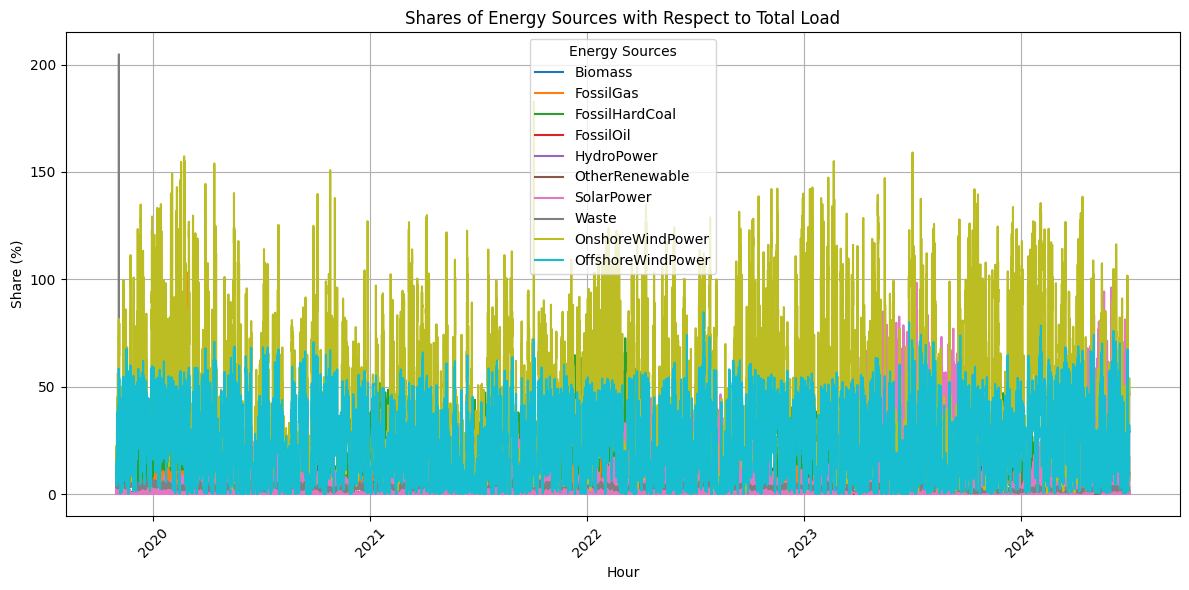

In [10]:
# Set the HourUTC column as the index for plotting
el_balance['HourUTC'] = pd.to_datetime(el_balance['HourUTC'])
el_balance.set_index('HourUTC', inplace=True)

# Plotting the shares
plt.figure(figsize=(12, 6))
for source in sources:
    plt.plot(el_balance.index, el_balance[f'{source}_share'], marker='', label=source)

plt.title('Shares of Energy Sources with Respect to Total Load')
plt.xlabel('Hour')
plt.ylabel('Share (%)')
plt.xticks(rotation=45)
plt.legend(title='Energy Sources')
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

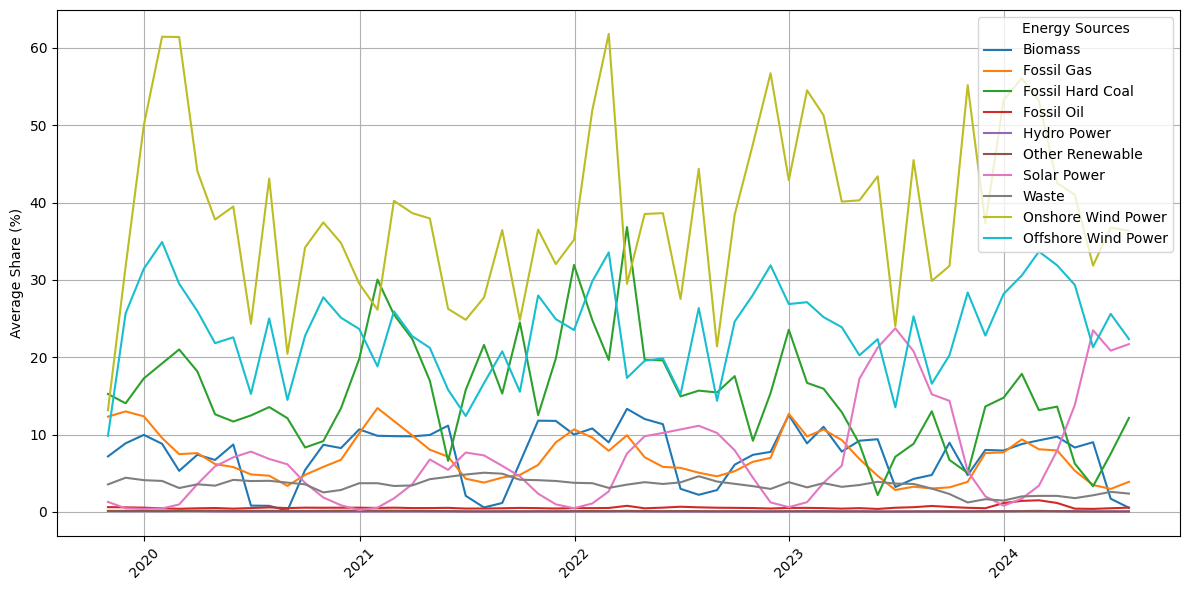

In [23]:
# Calculate monthly averages
monthly_averages = el_balance.resample('ME').mean()

label_mapping = {
    'Biomass': 'Biomass',
    'FossilGas': 'Fossil Gas',
    'FossilHardCoal': 'Fossil Hard Coal',
    'FossilOil': 'Fossil Oil',
    'HydroPower': 'Hydro Power',
    'OtherRenewable': 'Other Renewable',
    'SolarPower': 'Solar Power',
    'Waste': 'Waste',
    'OnshoreWindPower': 'Onshore Wind Power',
    'OffshoreWindPower': 'Offshore Wind Power'
}

# Optional: You can plot the monthly averages if needed
plt.figure(figsize=(12, 6))
for source in sources:
    plt.plot(monthly_averages.index, monthly_averages[f'{source}_share'], marker='', label=label_mapping[source])

plt.title('')
plt.xlabel('')
plt.ylabel('Average Share (%)')
plt.xticks(rotation=45)
plt.legend(title='Energy Sources')
plt.grid()
plt.tight_layout()

# Show the plot
plt.savefig(f'{path_to_images}energy_sources_share.png')
plt.show()